# ProtocolToAdjacencyExample

In [14]:
%matplotlib inline

In [15]:
from knesset_social_dynamics.parsers import commitees, graphs
import pathlib
import matplotlib.pyplot as plt
import random
import networkx as nx

# Choose a random committee file from the folder

In [16]:
committees_protocols_folder =  pathlib.Path('data/committee_protocols/')

In [17]:
random_committee_proto_path = random.choice(list(committees_protocols_folder.glob("*.doc")))

# Extract committee transcript

In [18]:
transcript = commitees.extract_committee_new_transcript(random_committee_proto_path)

2020-07-18 23:38:39.089 | DEBUG    | knesset_social_dynamics.parsers.text_extractor:extract_new_raw_protocol:15 - Parsing new-version protocoal


# Build interrupt network

In [19]:
inter_graph = graphs.extract_transcript_graph(transcript, g_type='committee_breaking')

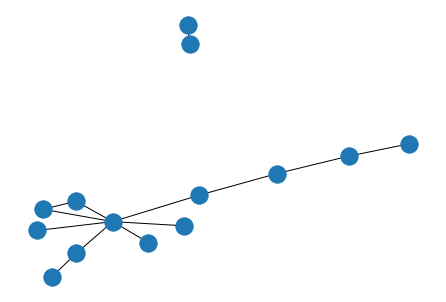

In [20]:
nx.draw(inter_graph)

# Extract adjacency matrix

In [21]:
adj_matrix = nx.convert_matrix.to_pandas_adjacency(inter_graph)

In [22]:
adj_matrix

,חגי מויאל,מנסור עבאס,נג׳ואה אבו נימר-עבאס,היבה יזבק,עולא נג'מי,חמד עמאר,קרן ברק,אורלי אלמגור נתן,ג'מאל חכרוש,משה ארבל,איימן עודה,רם בן ברק,אלי אלפסי,אורן כהן
חגי מויאל,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
מנסור עבאס,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
נג׳ואה אבו נימר-עבאס,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
היבה יזבק,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
עולא נג'מי,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
חמד עמאר,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
קרן ברק,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
אורלי אלמגור נתן,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
ג'מאל חכרוש,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
משה ארבל,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


# From transcript to local adjacency matrix

In [23]:
graphs.extract_transcript_adjacency(transcript, 'adjacency_example.csv')